In [1]:
# bulding a model using KNN for zoo dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("F:\\excelR\\assignments\\KNN assignment\\Zoo.csv")

In [3]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


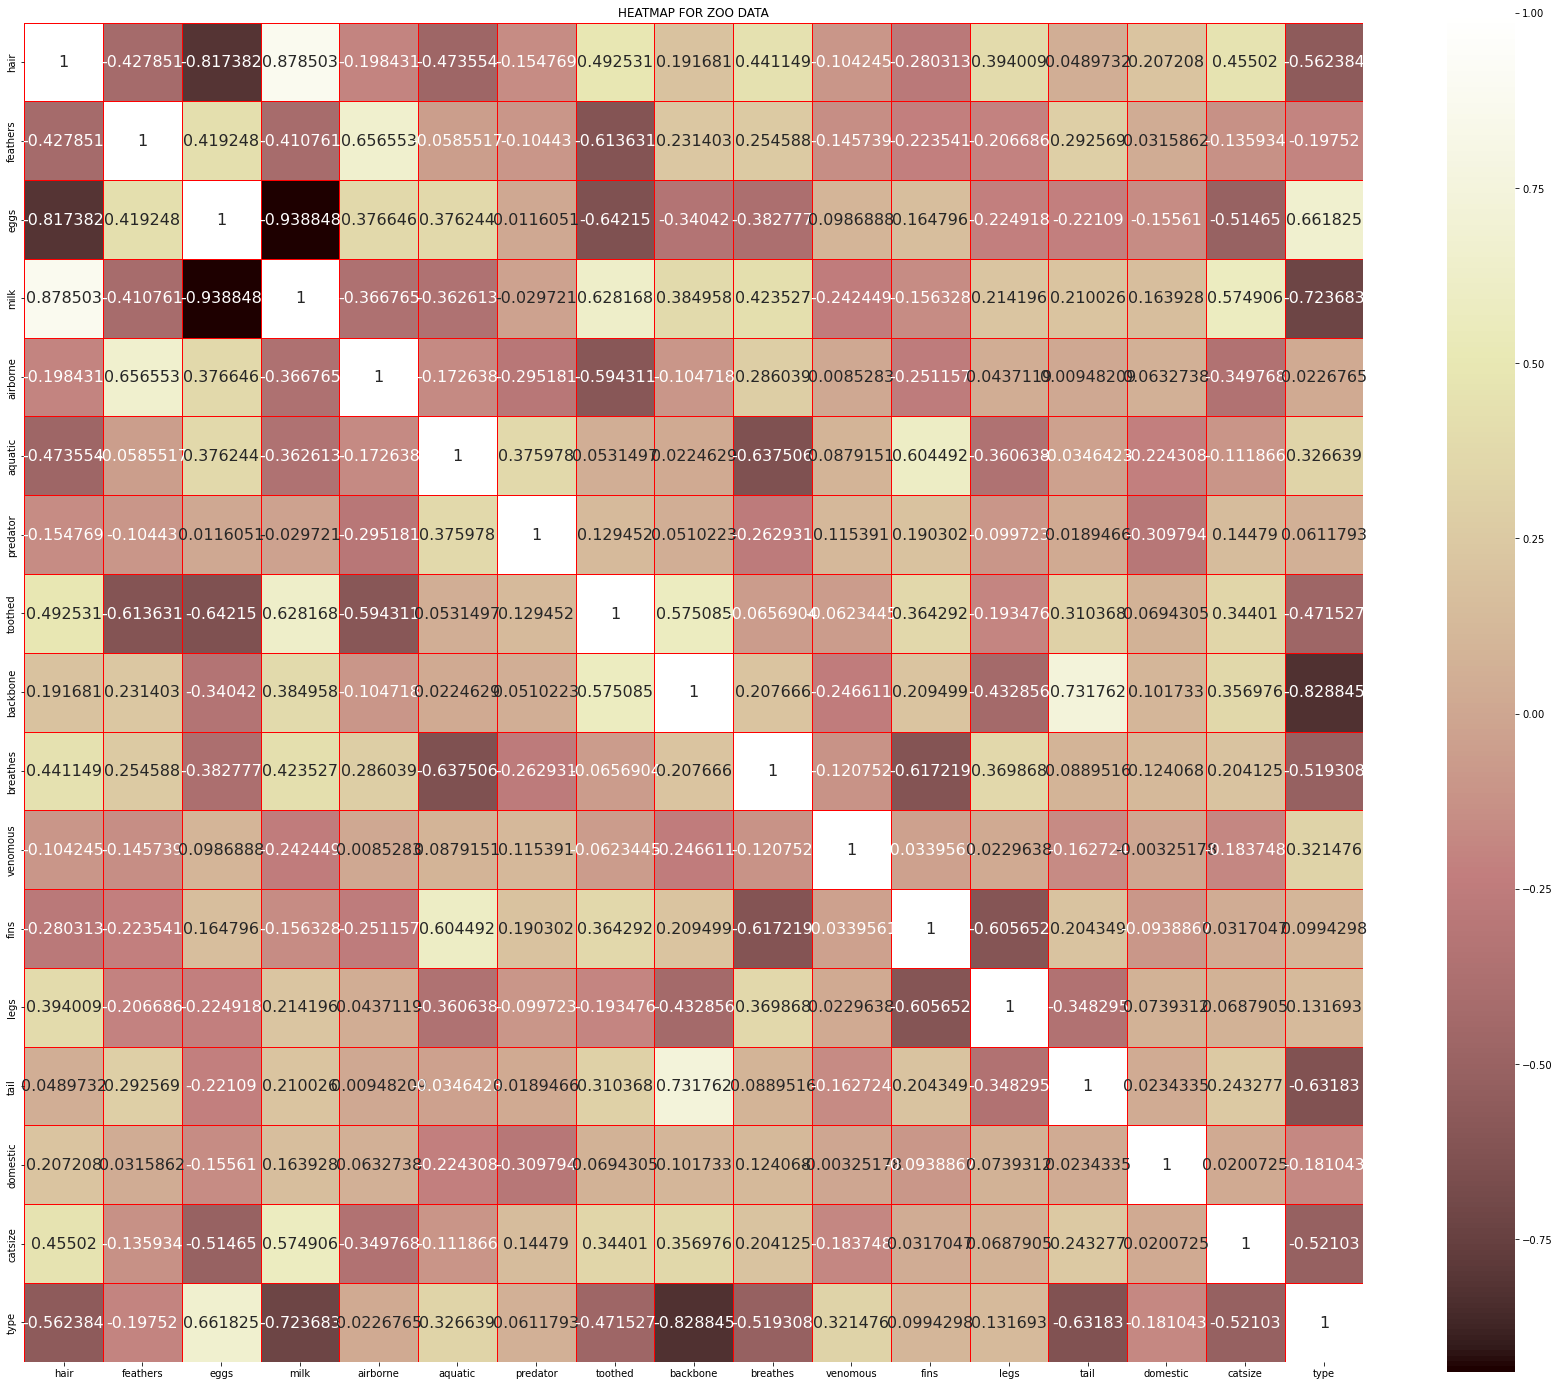

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(1,1,figsize=(30,25))
cor =df.corr()
ax=sns.heatmap(cor,annot=True,linewidths=1,linecolor='r',cmap="pink",fmt="g",square=True, annot_kws={'fontsize':16})
plt.title('HEATMAP FOR ZOO DATA')
plt.show()

In [8]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print( 'ANOVA Result \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [9]:
ContinuousVariables=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']
FunctionAnova(inpData=df, TargetVariable='type', ContinuousPredictorList=ContinuousVariables)

ANOVA Result 

hair is correlated with type | P-Value: 1.8456873398502807e-35
feathers is correlated with type | P-Value: 0.0
eggs is correlated with type | P-Value: 5.514907263184154e-43
milk is correlated with type | P-Value: 0.0
airborne is correlated with type | P-Value: 7.692154832418414e-19
aquatic is correlated with type | P-Value: 7.191672794553616e-11
predator is NOT correlated with type | P-Value: 0.05475628349182613
toothed is correlated with type | P-Value: 5.255950075625824e-51
backbone is correlated with type | P-Value: 0.0
breathes is correlated with type | P-Value: 1.7951436525513168e-33
venomous is correlated with type | P-Value: 0.0026396996437203636
fins is correlated with type | P-Value: 8.972164287150974e-26
legs is correlated with type | P-Value: 8.305909188211792e-15
tail is correlated with type | P-Value: 2.0894335555020327e-19
domestic is NOT correlated with type | P-Value: 0.5847847996983369
catsize is correlated with type | P-Value: 7.359245229709388e-08


C:\Users\dell\anaconda3\lib\site-packages\scipy\stats\stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'catsize']

In [11]:
Selected_columns = ContinuousVariables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[Selected_columns], df['type'], test_size=0.2, random_state=0)

In [12]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
62,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
64,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
47,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [14]:
y_train

62    3
3     1
71    2
45    1
48    1
     ..
97    6
67    1
64    1
47    1
44    1
Name: type, Length: 80, dtype: int64

In [15]:
clf= KNeighborsClassifier(n_neighbors=3)
clf

KNeighborsClassifier(n_neighbors=3)

In [16]:
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


In [18]:
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')

In [20]:
F1_Score

1.0

In [21]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN,df[Selected_columns], df['type'], cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"



Accuracy values for 10-fold Cross Validation:
 [1.         1.         1.         1.         1.         0.86666667
 0.86666667 0.86666667 0.85555556 0.9       ]

Final Average Accuracy of the model: 0.94


In [22]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

In [23]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 0.0
RMSE value for k=  3 is: 0.0
RMSE value for k=  4 is: 0.25
RMSE value for k=  5 is: 0.36514837167011066
RMSE value for k=  6 is: 0.4162696521251858
RMSE value for k=  7 is: 0.4613328389982578
RMSE value for k=  8 is: 0.5168298513419046
RMSE value for k=  9 is: 0.5722363485182933
RMSE value for k=  10 is: 0.6195236265143759
RMSE value for k=  11 is: 0.674491660729431
RMSE value for k=  12 is: 0.7287555530386415
RMSE value for k=  13 is: 0.7851825860491116
RMSE value for k=  14 is: 0.7857142857142857
RMSE value for k=  15 is: 0.8508943318774453
RMSE value for k=  16 is: 0.879452954966893
RMSE value for k=  17 is: 0.9344119652897142
RMSE value for k=  18 is: 0.9991177766257914
RMSE value for k=  19 is: 1.074521762861482
RMSE value for k=  20 is: 1.146838303876399


<AxesSubplot:>

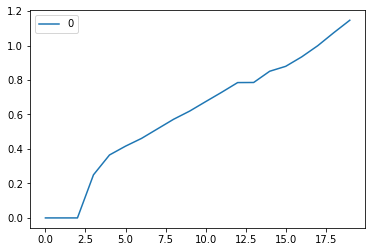

In [24]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [26]:
x=X_train
y=y_train

[Text(0.5, 0, 'Type of Animal Categor'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Before SMOTE')]

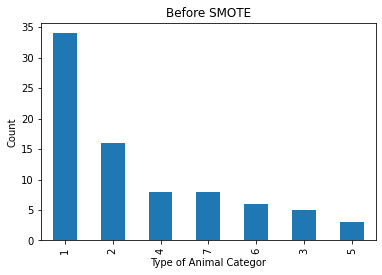

In [27]:
ax = y.value_counts().plot(kind="bar")
ax.set(xlabel="Type of Animal Categor", ylabel="Count", title = "Before SMOTE")